In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.optimize import minimize,Bounds

warnings.filterwarnings('ignore')


# Create column in format YYYY-MM-DD for actual and forecast

In [2]:
actual = pd.read_csv('REAL_TIME_wind.csv')
actual['Month'] = actual['Month'].astype(str).str.zfill(2)
actual['Day'] = actual['Day'].astype(str).str.zfill(2)
actual['Date'] = actual['Year'].astype(str)+ '-' + actual['Month'] + '-' + actual['Day']
actual.head()

,Year,Month,Day,Period,61402_OnshoreWindTurbine_FOARD,61343_OnshoreWindTurbine_WT1,62038_OnshoreWindTurbine_STRAE,61921_OnshoreWindTurbine_TAH,60087_OnshoreWindTurbine_SPII,62259_OnshoreWindTurbine_RAN,...,58048_OnshoreWindTurbine_1,56673_OnshoreWindTurbine_WEC,56457_OnshoreWindTurbine_1,58424_OnshoreWindTurbine_1,56602_OnshoreWindTurbine_SNY1,56211_OnshoreWindTurbine_SW1,56961_OnshoreWindTurbine_GE,56959_OnshoreWindTurbine_OWF,54979_OnshoreWindTurbine_WIND,Date
0,2018,01,02,0,41.685701,80.255466,43.470000,22.900,22.950,63.425,...,1.071154,2.308817,7.440873,2.253272,3.694720,2.485035,22.176320,8.754140,4.113576,2018-01-02
1,2018,01,02,1,42.415492,90.312992,41.428801,27.300,22.750,68.950,...,1.201923,2.527317,8.584800,2.298085,4.106140,1.967918,22.838243,7.705605,4.340292,2018-01-02
2,2018,01,02,2,35.905750,100.140191,40.798800,33.775,21.400,62.850,...,1.176923,2.017483,9.012436,2.372772,4.828143,2.379697,23.186422,11.522576,5.794322,2018-01-02
3,2018,01,02,3,42.532259,112.091500,35.683200,34.700,20.975,56.250,...,1.226923,1.398400,9.862364,2.363006,5.166960,2.872873,24.418439,13.661135,6.293532,2018-01-02
4,2018,01,02,4,48.283018,106.717250,32.508000,32.750,17.025,51.600,...,1.432692,0.626367,10.172400,2.518126,5.763924,3.057216,25.149233,13.106694,6.171454,2018-01-02


In [3]:
actual = actual.rename(columns = {'Period':'Hr', '61402_OnshoreWindTurbine_FOARD':'Gen'})
actual = actual[['Hr','Date','Gen']]

actual.reset_index(drop = True,inplace=True)
actual

,Hr,Date,Gen
0,0,2018-01-02,41.685701
1,1,2018-01-02,42.415492
2,2,2018-01-02,35.905750
3,3,2018-01-02,42.532259
4,4,2018-01-02,48.283018
...,...,...,...
8707,19,2018-12-30,170.742059
8708,20,2018-12-30,171.121551
8709,21,2018-12-30,159.765991
8710,22,2018-12-30,138.514458


In [4]:
forecast = pd.read_csv('DAY_AHEAD_wind.csv')
forecast['Month'] = forecast['Month'].astype(str).str.zfill(2)
forecast['Day'] = forecast['Day'].astype(str).str.zfill(2)
forecast['Date'] = forecast['Year'].astype(str)+ '-' + forecast['Month'] + '-' + forecast['Day']
forecast.head()

,Year,Month,Day,Period,61402_OnshoreWindTurbine_FOARD,61343_OnshoreWindTurbine_WT1,62038_OnshoreWindTurbine_STRAE,61921_OnshoreWindTurbine_TAH,60087_OnshoreWindTurbine_SPII,62259_OnshoreWindTurbine_RAN,...,58048_OnshoreWindTurbine_1,56673_OnshoreWindTurbine_WEC,56457_OnshoreWindTurbine_1,58424_OnshoreWindTurbine_1,56602_OnshoreWindTurbine_SNY1,56211_OnshoreWindTurbine_SW1,56961_OnshoreWindTurbine_GE,56959_OnshoreWindTurbine_OWF,54979_OnshoreWindTurbine_WIND,Date
0,2018,01,02,0,40.714308,60.190328,40.399261,19.566399,19.939212,56.626156,...,0.909856,2.226579,7.258541,2.234867,3.949811,2.415670,20.901568,8.300701,5.150576,2018-01-02
1,2018,01,02,1,45.803330,92.286895,42.046675,24.107478,23.340122,62.899532,...,1.069601,2.445759,7.478011,2.441905,3.601009,2.285626,20.497969,6.923673,3.218881,2018-01-02
2,2018,01,02,2,35.536468,94.958856,40.438477,30.014001,22.135304,73.027297,...,1.107702,2.150946,8.006864,2.442247,4.264115,1.825969,25.380811,10.398540,5.865214,2018-01-02
3,2018,01,02,3,35.588231,125.093423,39.777837,35.808317,22.045014,58.329734,...,1.064203,1.607329,9.005857,2.341691,4.551223,2.517759,22.610244,13.775111,6.392754,2018-01-02
4,2018,01,02,4,49.815408,94.512307,29.172646,36.158436,17.190456,52.481085,...,1.378018,1.117305,10.821093,2.177287,6.324176,2.718772,23.578235,14.042153,6.921669,2018-01-02


In [5]:
forecast = forecast.rename(columns = {'Period':'Hr', '61402_OnshoreWindTurbine_FOARD':'Gen'})
forecast = forecast[['Hr','Date','Gen']]
forecast.reset_index(drop = True,inplace=True)
forecast

,Hr,Date,Gen
0,0,2018-01-02,40.714308
1,1,2018-01-02,45.803330
2,2,2018-01-02,35.536468
3,3,2018-01-02,35.588231
4,4,2018-01-02,49.815408
...,...,...,...
8707,19,2018-12-30,181.947654
8708,20,2018-12-30,167.760595
8709,21,2018-12-30,182.208421
8710,22,2018-12-30,122.281890


# Max gen for one asset and rescale to [0,1]

In [6]:
print(np.max(forecast['Gen']))
print(np.max(actual['Gen']))
max_gen = np.maximum(np.max(forecast['Gen']),np.max(forecast['Gen']))
max_gen

forecast['Gen'] = forecast['Gen']/max_gen

actual['Gen'] = actual['Gen']/max_gen

350.3
315.9706035077572


Text(0.5, 1.0, 'April 12')

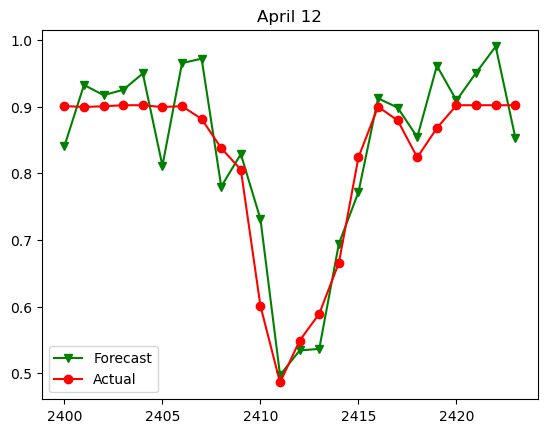

In [7]:
plt.plot(forecast.loc[forecast['Date'].str.contains('2018-04-12'),:]['Gen'],color = "green", marker = "v")
plt.plot(actual.loc[actual['Date'].str.contains('2018-04-12'),:]['Gen'],color = "red", marker = "o")
plt.legend(['Forecast','Actual'])
plt.title("April 12")

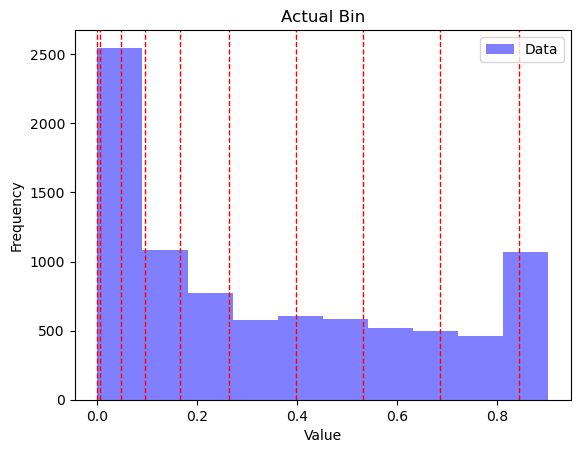

In [8]:

# Creating 10 bins for the 'Amazon Wind Farm Texas' column
bins = pd.qcut(actual['Gen'], q=10,duplicates='drop',precision=20)
# Plot histogram with quantiles
plt.hist(actual['Gen'], bins=10, alpha=0.5, color='blue', label='Data')
for q in bins.unique():
    plt.axvline(q.left, color='red', linestyle='--', linewidth=1)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Actual Bin')
plt.legend()
plt.show()

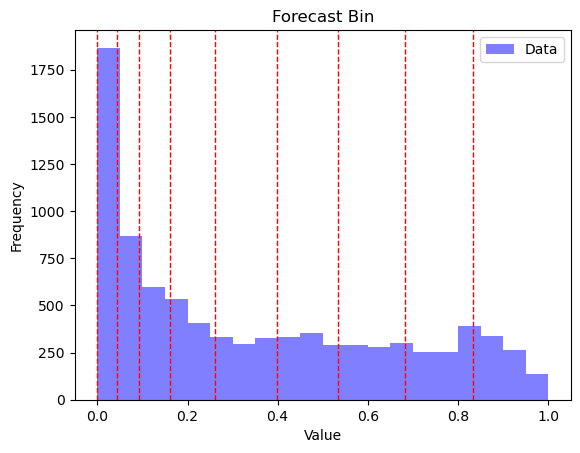

In [9]:


# Creating 10 bins for the 'Amazon Wind Farm Texas' column
bins = pd.qcut(forecast['Gen'], q=10,duplicates='drop',precision=10)
# Plot histogram with quantiles
plt.hist(forecast['Gen'], bins=20, alpha=0.5, color='blue', label='Data')
for q in bins.unique():
    plt.axvline(q.left, color='red', linestyle='--', linewidth=1)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Forecast Bin')
plt.legend()
plt.show()



# Only 9 bins, cannot create 10 bins due to overlapping bins


In [10]:
bins.cat.categories.shape

(9,)

 Historical data to create 10 quantile bins.
 Based on forecast of hour, see which bin it belongs to, use sigma, b for that bin. I.e; all the historical observations in that hour regardless of where they are should go to f_h.
 Then, perform residual minimizaiton

In [11]:
for i in range(9):
    
    bin_lower = bins.cat.categories[i].left
    bin_upper = bins.cat.categories[i].right
    wind_amzn = forecast.loc[(forecast['Gen']>bin_lower) & (forecast['Gen'] <=bin_upper),['Gen']]
    print(f"Bin LB: { bin_lower}, Bin UB: {bin_upper} ")
    print("Observations in bin" + str(i+1) + ": "+str(wind_amzn.shape[0])+ "\n")

Bin LB: -1e-10, Bin UB: 0.04418639499 
Observations in bin1: 1743

Bin LB: 0.04418639499, Bin UB: 0.09134535088 
Observations in bin2: 871

Bin LB: 0.09134535088, Bin UB: 0.1622087739 
Observations in bin3: 871

Bin LB: 0.1622087739, Bin UB: 0.2614138396 
Observations in bin4: 871

Bin LB: 0.2614138396, Bin UB: 0.399267203 
Observations in bin5: 871

Bin LB: 0.399267203, Bin UB: 0.5332595732 
Observations in bin6: 871

Bin LB: 0.5332595732, Bin UB: 0.6815323733 
Observations in bin7: 871

Bin LB: 0.6815323733, Bin UB: 0.8328449939 
Observations in bin8: 871

Bin LB: 0.8328449939, Bin UB: 1.0 
Observations in bin9: 872



# Regress $(X_{t+1} - X_{t}) / \sqrt{dt}$  against $(m_{t} - X{t})  \sqrt{dt}$.

In [12]:
from collections import defaultdict
import numpy as np 
mean_rev_dics = defaultdict(float)
sigma_dics = defaultdict(float)
residuals_dic = defaultdict(np.ndarray)



In [13]:
dt = 1
import statsmodels.api as sm
from scipy.stats import median_abs_deviation
def b_sigma_estimator(bin_idx):
    bin_lower= bins.cat.categories[bin_idx].left
    bin_upper = bins.cat.categories[bin_idx].right
    forecast_in_bin =  forecast.loc[(forecast['Gen']>bin_lower) & (forecast['Gen'] <=bin_upper),['Gen']].to_numpy().flatten()
    actual_in_bin = actual.loc[(forecast['Gen']>bin_lower) & (forecast['Gen'] <=bin_upper),['Gen']].to_numpy().flatten()


    responses = (actual_in_bin[1:] - actual_in_bin[:-1])/ np.sqrt(dt)
    predictors = (forecast_in_bin[:-1] - actual_in_bin[:-1]) * np.sqrt(dt)
    predictors =  predictors
    print(responses.shape,predictors.shape)

    # Define and fit the model
    Y = responses
    X = predictors.reshape(-1,1)
    model = sm.OLS(Y, X)
    results = model.fit()

    residuals = results.resid
 

    z_scores = np.abs((residuals - np.mean(residuals)) / np.std(residuals))
    threshold = 3# 95% z score
    outlier_indices = np.where(z_scores > threshold)
    cleaned_residuals_z = np.delete(residuals, outlier_indices)
    mean_rev_rate = results.params[0]
    sigma = np.std(cleaned_residuals_z)


    #sigma = 1.48*median_abs_deviation(residuals)

    mean_rev_dics[bin_idx] = mean_rev_rate
    sigma_dics[bin_idx] = sigma
    residuals_dic[bin_idx] = residuals
    return mean_rev_rate,sigma


In [14]:

for i in range(9):
    print(b_sigma_estimator(i))

(1742,) (1742,)
(0.8208132947183979, 0.02103038197813619)
(870,) (870,)
(0.913960405800829, 0.032380280570652877)
(870,) (870,)
(0.9576923328540746, 0.0460004666735641)
(870,) (870,)
(1.010614323206221, 0.06906980317781287)
(870,) (870,)
(0.9615706504117948, 0.08880076105139284)
(870,) (870,)
(0.9392875255657924, 0.08543894690623055)
(870,) (870,)
(0.8647884063391102, 0.09534098149003292)
(870,) (870,)
(0.7235597948575127, 0.08567051909867014)
(871,) (871,)
(0.37167441504992427, 0.04218578150842062)


Text(0.5, 1.0, '$\\hat{\\alpha}$  by Bin')

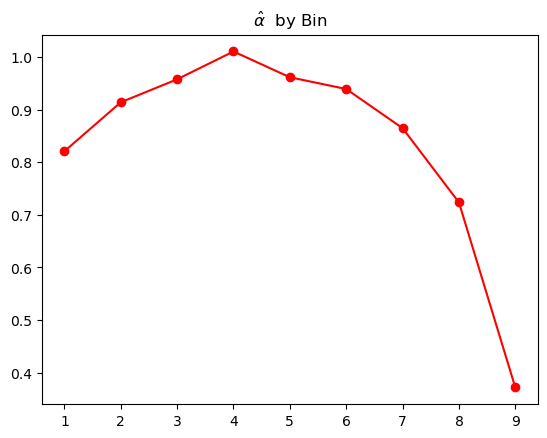

In [16]:
plt.plot(np.linspace(1,9,9),mean_rev_dics.values(),color = "red",marker = "o")
plt.xticks(np.linspace(1,9,9))
plt.title(r"$\hat{\alpha}$  by Bin")

Text(0.5, 1.0, '$\\hat{\\sigma}$  by Bin')

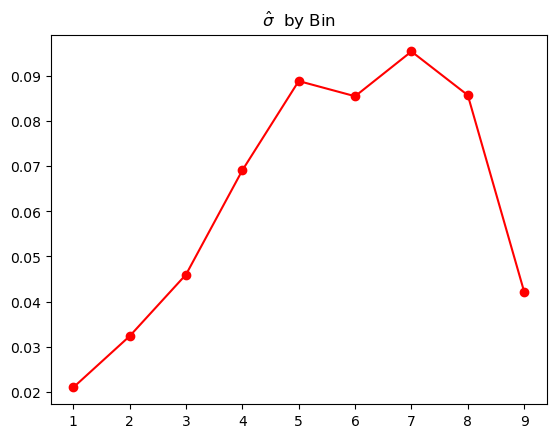

In [15]:
plt.plot(np.linspace(1,9,9),sigma_dics.values(),color = "red",marker = "o")
plt.xticks(np.linspace(1,9,9))
plt.title(r"$\hat{\sigma}$  by Bin")

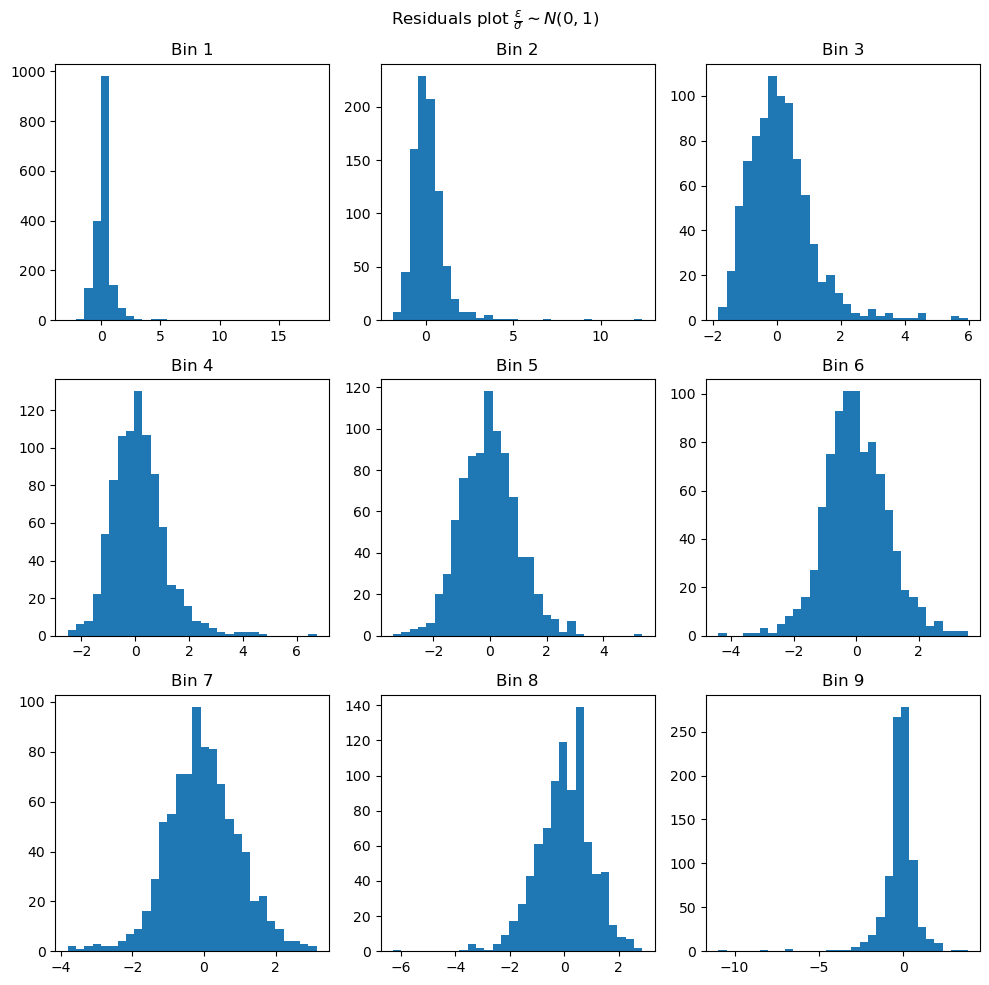

In [17]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# Flatten the axs array to make it easier to iterate over
axs = axs.flatten()

# Plot each subplot
for i in range(9):
    axs[i].hist(residuals_dic[i]/np.std(residuals_dic[i]),bins = 30)
    axs[i].set_title(f'Bin {i+1}')
plt.suptitle(r"Residuals plot $\frac{\epsilon}{\sigma} \sim N(0,1) $")
# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Show the plot
plt.show()

## In the next step, we will test on April 12 data
### Select sequence of $\sigma_{hat}$ and $\alpha_{hat}$ by forecast bin for each hour.
### Simulate SDE and report CI.


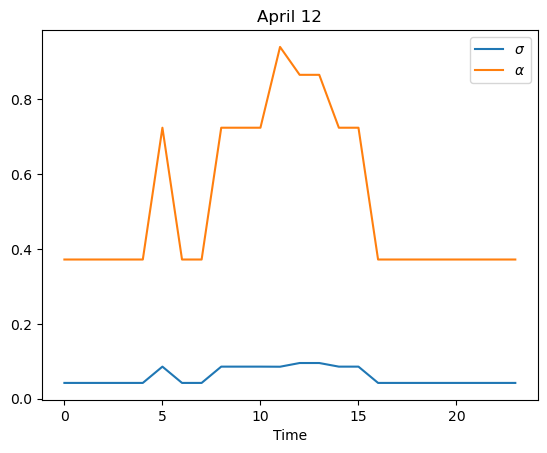

In [18]:


aprl_frcast = forecast.loc[forecast['Date'].str.contains('2018-04-12'),:]['Gen'].to_numpy()
aprl_act = actual.loc[actual['Date'].str.contains('2018-04-12'),:]['Gen'].to_numpy()
sigmas = np.zeros(24)
mean_rates = np.zeros(24)
for i in range(24):
    idx = bins.cat.categories.get_indexer([aprl_frcast[i]])[0]
    sigmas[i] = sigma_dics[idx]
    mean_rates[i] = mean_rev_dics[idx]

plt.plot(sigmas,label = r"$\sigma$")
plt.plot(mean_rates,label = r"$\alpha$")
plt.title("April 12")
plt.xlabel("Time")
plt.legend()

# Simulate SDE with Normal noises and report CI

In [19]:

dt = 1

W = np.random.normal(0,1,size = (10000,24) )
Xs = np.zeros((10000,25))

Xs[:,0]= np.minimum(np.random.normal(aprl_frcast[0],0.05,size = (10000) ),1)

for i in range(1,25):
    Xs[:,i] = np.abs(Xs[:,i-1] + ( mean_rates[i-1] * (aprl_frcast[i-1]- Xs[:,i-1]) * dt  ) + sigmas[i-1] * W[:,i-1] *np.sqrt(dt))
    #Xs[:,i] = np .minimum(Xs[:,i],1)


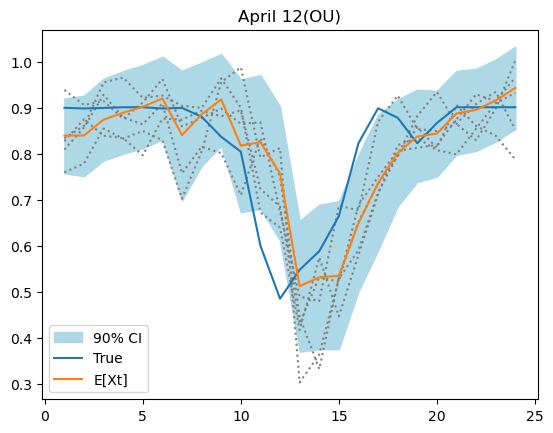

In [21]:
# Calculate the quantiles (0.005 and 0.995 for 99% CI)
lower_quantile = np.quantile(Xs, 0.05, axis=0)[:-1]
upper_quantile = np.quantile(Xs, 0.95, axis=0)[:-1]
preds = np.mean(Xs,axis=0)[:-1]
# Plotting
plt.fill_between(np.arange(1,25), lower_quantile, upper_quantile, color='lightblue', label='90% CI')
#plt.plot(np.arange(1,25),aprl_frcast,label = "Forecast")

for i in range(5):
    plt.plot(np.arange(1,25),Xs[i+10,:-1], linestyle='dotted', color='grey')
plt.plot(np.arange(1,25),aprl_act,label = "True")
plt.plot(np.arange(1,25),preds, label = "E[Xt]")
plt.title("April 12(OU)")
plt.legend()

# Simulate SDE with boostrap and report CI after rescaling with $\textbf{MaxGen}$

In [22]:

dt = 1

W = np.random.normal(0,1,size = (10000,24) )
Xs = np.zeros((10000,25))

Xs[:,0]= np.minimum(np.random.normal(aprl_frcast[0],0.05,size = (10000) ),1)

for i in range(1,25):
    idx = bins.cat.categories.get_indexer([aprl_frcast[i-1]])[0]
    #data = (residuals_dic[idx],)  # samples must be in a sequence
    #sigmas = bootstrap(data, np.std, confidence_level=0.95,n_resamples=10000).bootstrap_distribution

    noises = np.random.choice((residuals_dic[idx]-np.mean(residuals_dic[idx]))/sigma_dics[idx]  ,size=10000, replace = True)
    #Xs[:,i] = np.abs(Xs[:,i-1] + ( mean_rates[i-1] * (aprl_frcast[i-1]- Xs[:,i-1]) * dt  ) +sigmas* ( (Xs[:,i-1]) * (1-Xs[:,i-1]) ) *np.sqrt(dt) * W[:,i-1])
    Xs[:,i] = np.abs(Xs[:,i-1] + ( mean_rates[i-1] * (aprl_frcast[i-1]- Xs[:,i-1]) * dt  ) + sigma_dics[idx] * noises*   np.sqrt(dt))
    Xs[:,i] = np.minimum(Xs[:,i],1)


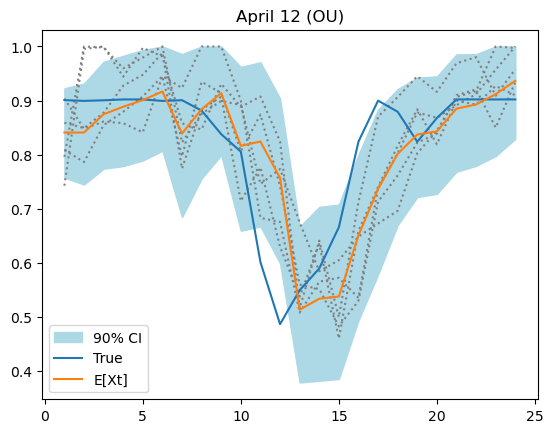

In [23]:
# Calculate the quantiles (0.005 and 0.995 for 99% CI)
lower_quantile = np.quantile(Xs, 0.05, axis=0)[:-1]
upper_quantile = np.quantile(Xs, 0.95, axis=0)[:-1]
preds = np.mean(Xs,axis=0)[:-1]

plt.fill_between(np.arange(1,25), lower_quantile, upper_quantile, color='lightblue', label='90% CI')
#plt.plot(np.arange(1,25),aprl_frcast,label = "Forecast")

for i in range(5):
    plt.plot(np.arange(1,25),Xs[i+10,:-1] ,linestyle='dotted', color='grey')
plt.plot(np.arange(1,25),aprl_act,label = "True")
plt.plot(np.arange(1,25),preds, label = "E[Xt]")

plt.title("April 12 (OU)")
plt.legend()

In [25]:
import RMC
X0 = np.minimum(np.random.normal(aprl_frcast[0],0.05,size = (10000) ),1)
sigmas = np.zeros(24)
mean_rates = np.zeros(24)
noises=  np.zeros((10000,24))
for i in range(24):

    idx = bins.cat.categories.get_indexer([aprl_frcast[i]])[0]
    sigmas[i] = sigma_dics[idx]
    mean_rates[i] = mean_rev_dics[idx]
    noises[:,i] =   np.random.choice((residuals_dic[idx]-np.mean(residuals_dic[idx]))/sigma_dics[idx]  ,size=10000, replace = True)
process = RMC.simulate.OU(X0,24,10000,24,mean_rates,aprl_frcast,sigmas,1,0,noises)

running_cost = RMC.costfunctions.L2()
final_cost = RMC.costfunctions.final_SOCcontraint(0.1,0)
parameters = (0.25,1,0.95,0.05)
batch_size = 50
value_kernel= None
normalize_v = True
policy_kernel = None
normalize_policy = True
hybrid_solution = RMC.model.HybridControl(600,process,running_cost,final_cost,parameters,batch_size,\
                                          value_kernel,normalize_v,policy_kernel,normalize_policy)

hybrid_solution.X_lowers = np.ones(25)*0
hybrid_solution.X_uppers= np.ones(25)*1
LB,UB = process.CI_95

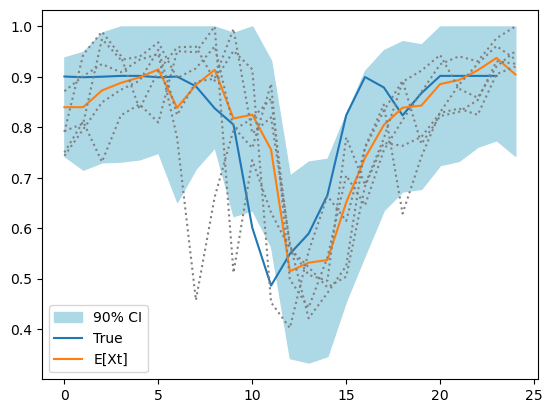

In [26]:
plt.fill_between(np.arange(0,25), LB, UB, color='lightblue', label='90% CI')
plt.plot(np.arange(0,24),aprl_act,label = "True")
plt.plot(np.arange(0,25),process.mean_vec, label = "E[Xt]")
for i in range(5):
    plt.plot(np.arange(0,25),process.sim_trajectories[i+10,:] ,linestyle='dotted', color='grey')
plt.legend()

In [27]:
hybrid_solution.solve()

Policy GP MSE: 1.0695150101743065e-16
Value GP MSE: 4.062808233399741e-06
Timestep: 23.0
__________________________________________________
Policy GP MSE: 8.705045751197905e-15
Value GP MSE: 7.70297965259512e-06
Timestep: 22.0
__________________________________________________
Policy GP MSE: 4.972399734136444e-13
Value GP MSE: 6.079770547679229e-06
Timestep: 21.0
__________________________________________________
Policy GP MSE: 7.223987481312779e-12
Value GP MSE: 2.744913300278644e-05
Timestep: 20.0
__________________________________________________
Policy GP MSE: 1.0672047716675566e-12
Value GP MSE: 2.6519413975680295e-05
Timestep: 19.0
__________________________________________________
Policy GP MSE: 9.808152399350753e-13
Value GP MSE: 1.2932991739655722e-05
Timestep: 18.0
__________________________________________________
Policy GP MSE: 1.8079958632346606e-09
Value GP MSE: 1.0593330514285682e-05
Timestep: 17.0
__________________________________________________
Policy GP MSE: 4.67761

In [28]:
Bmin = hybrid_solution.Bmin
Bmax = hybrid_solution.Bmax
true_Imax =hybrid_solution.Iub
true_Imin =hybrid_solution.Ilb
idx = 12
target = aprl_frcast[idx]
X_lb = np.maximum(target-0.3,0)
X_ub = np.minimum(target+0.3,1)
X_range = np.linspace(X_lb,X_ub,100)
I_range  = np.linspace(true_Imin,true_Imax,100)
neg_Xs = np.where(X_range<=0)
pos_Xs = np.where(X_range>0)
B_range = np.zeros((len(I_range),len(X_range)))
B_range_cap = np.zeros((len(I_range),len(X_range)))

for i in range(len(I_range)):
    charges = I_range[i] * np.ones(len(X_range))
    LB = np.maximum(hybrid_solution.Bmin,hybrid_solution.charging_eff*(hybrid_solution.Ilb- charges)/hybrid_solution.dt)
    UB = np.minimum(hybrid_solution.Bmax,(hybrid_solution.Iub-charges)/(hybrid_solution.charging_eff*hybrid_solution.dt))
    inp = np.column_stack((X_range,charges))

    B_range[i,:] = hybrid_solution.policy_maps[idx].predict(inp)[0].flatten()
    B_range_cap[i,:] = B_range[i,:]
    # according to scipy.optimize, B>0 when X>=M
    pos_outputs = np.where( B_range[i,:]>0)
    # do not charge more than X-M, causing O < M , ensures B<= X-M or M<=X-B
    upper_charging_bound  = np.maximum(X_range[pos_outputs]-aprl_frcast[idx],0)
    B_range_cap[i,pos_outputs] = np.minimum(B_range_cap[i,pos_outputs],upper_charging_bound)

    # according to scipy.optimize, B<0 when X<=M
    neg_outputs = np.where( B_range[i,:]<0)
    # do not discharge more than X-M, causing O > M , ensures B>= X-M or M>=X-B
    lower_charging_bound  = np.minimum(X_range[neg_outputs]-aprl_frcast[idx],0)
    B_range_cap[i,neg_outputs] = np.maximum(B_range_cap[i,neg_outputs],lower_charging_bound)

    B_range_cap[i,:] = np.maximum(LB,np.minimum(B_range_cap[i,:],UB))



Target at 12.0 is 0.5340963801897101


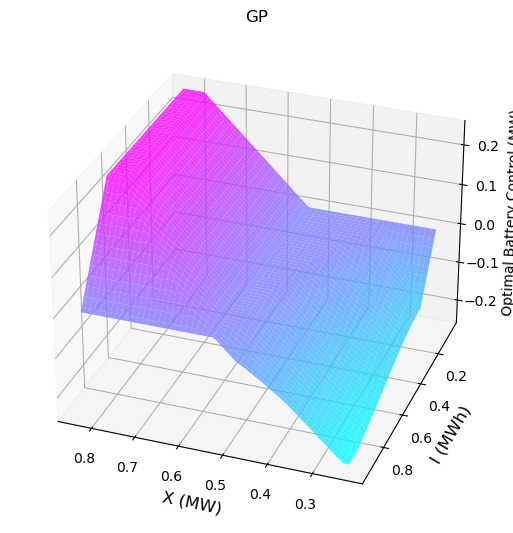

In [29]:

import matplotlib.pyplot as plt
X, Y = np.meshgrid(X_range, I_range)

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(121,projection= "3d")
ax.plot_surface(X, Y, B_range_cap, cmap='cool', alpha=0.8)
ax.set_title("GP")
ax.set_xlabel('X (MW)', fontsize=12)
ax.view_init(30, 110)
ax.set_ylabel('I (MWh)', fontsize=12)
ax.set_zlabel('Optimal Battery Control (MW)', fontsize=10)
t = np.linspace(0,24,25)
print(f"Target at {t[idx]} is {target}") 

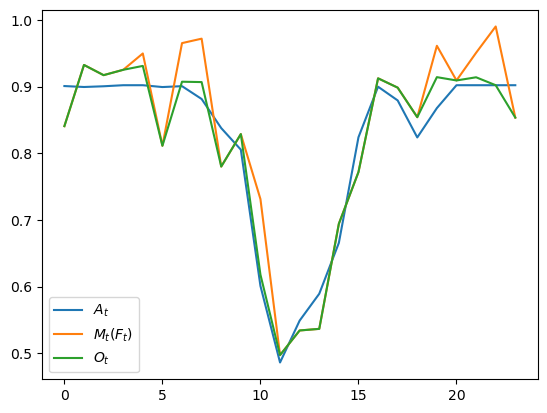

In [35]:
X,I,B,cost = hybrid_solution.onePath_control(aprl_act,0.1)
plt.plot(X)
plt.plot(hybrid_solution.targets)
plt.plot(X-B)
plt.legend([r"$A_t$",r"$M_t(F_t)$",r"$O_t$"])


In [38]:
Xs,Is,Bts,mean_cost = hybrid_solution.monteCarlo_control(aprl_frcast[0],0.5,10000,0.05,randomize=True)

In [39]:
print(np.sum(np.max(Is,axis=1) <hybrid_solution.Iub)/10000)
print(np.sum(np.min(Is,axis=1) >hybrid_solution.Ilb)/10000)
print(np.sum(np.max(Bts,axis=1) <hybrid_solution.Bmax)/10000)
print(np.sum(np.min(Bts,axis=1) >hybrid_solution.Bmin)/10000)

0.7888
0.6356
0.5221
0.8392


In [40]:
import RMC
X0 = np.minimum(np.random.normal(aprl_frcast[0],0.05,size = (10000) ),1)
sigmas = np.zeros(24)
mean_rates = np.zeros(24)
noises=  np.zeros((10000,24))
for i in range(24):

    idx = bins.cat.categories.get_indexer([aprl_frcast[i]])[0]
    sigmas[i] = sigma_dics[idx]
    mean_rates[i] = mean_rev_dics[idx]
    noises[:,i] =   np.random.choice((residuals_dic[idx]-np.mean(residuals_dic[idx]))/sigma_dics[idx]  ,size=10000, replace = True)
process = RMC.simulate.OU(X0,24,10000,24,mean_rates,aprl_frcast,sigmas,1,0,noises)

running_cost = RMC.costfunctions.L2()
final_cost = RMC.costfunctions.final_SOCcontraint(0.1,0)
parameters = (0.10,0.30,0.95,0.05)
batch_size = 50
value_kernel= None
normalize_v = True
policy_kernel = None
normalize_policy = True
hybrid_solution = RMC.model.HybridControl(600,process,running_cost,final_cost,parameters,batch_size,\
                                          value_kernel,normalize_v,policy_kernel,normalize_policy)

hybrid_solution.X_lowers = np.ones(25)*0
hybrid_solution.X_uppers= np.ones(25)*1
LB,UB = process.CI_95

hybrid_solution.solve()

Policy GP MSE: 3.66475169208654e-19
Value GP MSE: 9.324940606811333e-06
Timestep: 23.0
__________________________________________________
Policy GP MSE: 3.602431272784416e-08
Value GP MSE: 1.4195788583185453e-05
Timestep: 22.0
__________________________________________________
Policy GP MSE: 5.636116956947214e-14
Value GP MSE: 3.803679230080431e-05
Timestep: 21.0
__________________________________________________
Policy GP MSE: 3.59668817231133e-13
Value GP MSE: 5.2306473678338195e-05
Timestep: 20.0
__________________________________________________
Policy GP MSE: 2.7915527373670366e-14
Value GP MSE: 5.4018021275932666e-05
Timestep: 19.0
__________________________________________________
Policy GP MSE: 9.18548473385669e-14
Value GP MSE: 3.446124261337099e-05
Timestep: 18.0
__________________________________________________
Policy GP MSE: 3.7303625889472134e-13
Value GP MSE: 1.7199625032391718e-05
Timestep: 17.0
__________________________________________________
Policy GP MSE: 8.3352746

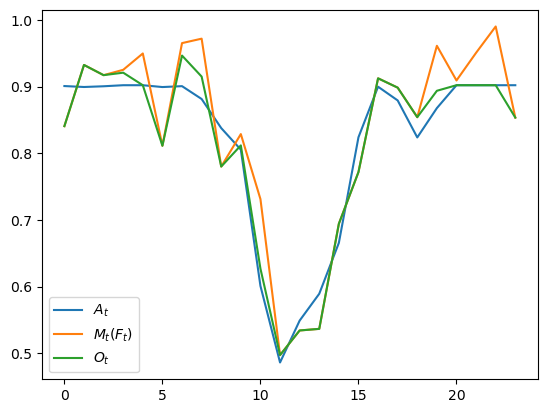

In [41]:
X,I,B,cost = hybrid_solution.onePath_control(aprl_act,0.1*0.3)
plt.plot(X)
plt.plot(hybrid_solution.targets)
plt.plot(X-B)
plt.legend([r"$A_t$",r"$M_t(F_t)$",r"$O_t$"])

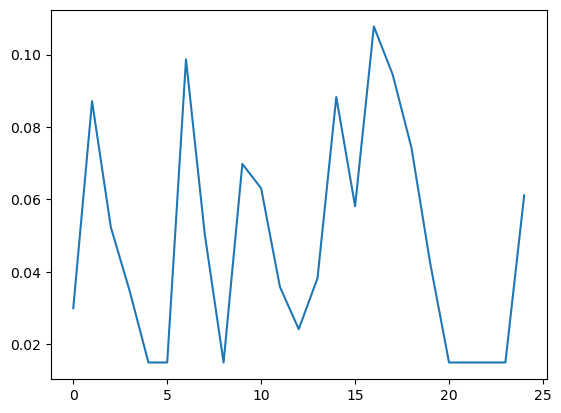

In [42]:
plt.plot(I)

In [43]:
Xs,Is,Bts,mean_cost = hybrid_solution.monteCarlo_control(aprl_frcast[0],0.15,10000,0.05,randomize=True)

In [45]:
print(np.sum(np.max(Is,axis=1) <hybrid_solution.Iub)/10000)
print(np.sum(np.min(Is,axis=1) >hybrid_solution.Ilb)/10000)
print(np.sum(np.max(Bts,axis=1) <hybrid_solution.Bmax)/10000)
print(np.sum(np.min(Bts,axis=1) >hybrid_solution.Bmin)/10000)

0.5819
0.2216
0.0084
0.3077


In [49]:
3*149/60

7.45

In [50]:
113

113